<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:300%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Sentiment Analysis with EDA 📊🧠</h1>

![](https://th.bing.com/th/id/OIG2.yXien8af0tNvV6zPcXX5?w=1024&h=1024&rs=1&pid=ImgDetMain)

<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk import ngrams
import spacy
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.style.use('fivethirtyeight')
color = ['#E36149', '#49AF72']
color_palette = ["#FF6F61", "#6B5B95"] 

2024-06-15 19:12:15.216772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 19:12:15.216963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 19:12:15.402833: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Loading Dataset</h1>

In [2]:
df = pd.read_csv('/kaggle/input/vs-sentiment-analysis/Beginner_Reviews_dataset.csv')
pd.set_option('display.max_colwidth', None)

<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Data Exploration</h1>

In [3]:
df.head()

,Unnamed: 0,sentence,label
0,0,Wow... Loved this place.,1
1,1,Crust is not good.,0
2,2,Not tasty and the texture was just nasty.,0
3,3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,4,The selection on the menu was great and so were the prices.,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   sentence    1000 non-null   object
 2   label       1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [5]:
df.isna().sum()

Unnamed: 0    0
sentence      0
label         0
dtype: int64

In [6]:
df.duplicated().sum()

0

<div style="border-radius: 5px; border: 1px solid #000000; padding: 20px; background-color: #eff0ea; text-align: left; color: #0e2a45;">
    <b><u>After basic exploration:</u></b>
    <ul>
        <li>The dataset contains 3 columns: <b>(Unnamed:0, sentence, label)</b></li>
        <li><b>Unnamed:0</b> contains numbers which are indexes, <b>sentence</b> contains text, and <b>label</b> contains binary values 0 and 1</li>
        <li>The data type of <b>Unnamed:0</b> is int64, <b>sentence</b> is object, and <b>label</b> is int64</li>
        <li>There are no null values in the data</li>
        <li>There are no duplicate values in the data</li>
    </ul>
    <b><u>Things to do:</b></u>
    <ul>
        <li>Drop the <b>Unnamed:0</b> column</li>
        <li>Correct the data type of the <b>label</b> column</li>
    </ul>
</div>


<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Cleaning</h1>

In [7]:
df['label'] = df['label'].astype('category')

In [8]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [9]:
df['sentence'].head(15)

0                                                                                            Wow... Loved this place.
1                                                                                                  Crust is not good.
2                                                                           Not tasty and the texture was just nasty.
3                             Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
4                                                         The selection on the menu was great and so were the prices.
5                                                                      Now I am getting angry and I want my damn pho.
6                                                                               Honeslty it didn't taste THAT fresh.)
7     The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
8                                                       

Wow... Loved this place.   --->>>    wow loved this place

In [10]:
re.sub(r'[^A-Za-z0-9\s]+', '', 'Wow... Loved this place.')

'Wow Loved this place'

In [11]:
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]+', '', text)

In [12]:
def lower_case(text):
    return text.lower()

In [13]:
df['sentence'] = df['sentence'].apply(remove_special_characters)
df['sentence'] = df['sentence'].apply(lower_case)

In [14]:
df['sentence'].head()

0                                                                      wow loved this place
1                                                                         crust is not good
2                                                  not tasty and the texture was just nasty
3    stopped by during the late may bank holiday off rick steve recommendation and loved it
4                                the selection on the menu was great and so were the prices
Name: sentence, dtype: object

In [15]:
df['sentence'].sample(20)

852                                                                           so flavorful and has just the perfect amount of heat
882                                                                                                we definately enjoyed ourselves
946                                                               it was a bit too sweet not really spicy enough and lacked flavor
534                                                                                                            terrible management
220    the shower area is outside so you can only rinse not take a full shower unless you dont mind being nude for everyone to see
894                                                                 if you stay in vegas you must get breakfast here at least once
351                                                                                                                he was terrible
786                                                                                

In [16]:
sentence_with_stopwords = 'i personally love the hummus pita baklava falafels and baba ganoush its amazing what they do with eggplant'
clean_words = ''
for word in sentence_with_stopwords.split():
    if word not in stopwords.words('english'):
        clean_words += ' ' + word

print(clean_words)

 personally love hummus pita baklava falafels baba ganoush amazing eggplant


In [17]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [18]:
df['sentence'].head(10)

0                                                                                              wow loved this place
1                                                                                                 crust is not good
2                                                                          not tasty and the texture was just nasty
3                            stopped by during the late may bank holiday off rick steve recommendation and loved it
4                                                        the selection on the menu was great and so were the prices
5                                                                     now i am getting angry and i want my damn pho
6                                                                                honeslty it didnt taste that fresh
7    the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer
8                                                                       

In [19]:
nlp = spacy.load('en_core_web_sm')
sentence = 'potatoes like rubber could tell made ahead time kept warmer'
doc = nlp(sentence)
lemmatized_sentence = ' '.join([token.lemma_ for token in doc])
print(lemmatized_sentence)

potato like rubber could tell make ahead time keep warm


In [20]:
def lemmatize_sentence(text):
    doc = nlp(text)
    lemmatized_sentence = ' '.join([token.lemma_ for token in doc])
    return lemmatized_sentence

In [21]:
df['sentence'] = df['sentence'].apply(lemmatize_sentence)

In [22]:
df['sentence'].head(10)

0                                                                                       wow love this place
1                                                                                         crust be not good
2                                                                   not tasty and the texture be just nasty
3                        stop by during the late may bank holiday off rick steve recommendation and love it
4                                                    the selection on the menu be great and so be the price
5                                                                 now I be get angry and I want my damn pho
6                                                                       honeslty it do not taste that fresh
7    the potato be like rubber and you could tell they have be make up ahead of time be keep under a warmer
8                                                                                      the fry be great too
9                           

In [23]:
df['sentence'] = df['sentence'].apply(remove_stopwords)

In [24]:
df.head()

,sentence,label
0,wow love place,1
1,crust good,0
2,tasty texture nasty,0
3,stop late may bank holiday rick steve recommendation love,1
4,selection menu great price,1


In [25]:
df.duplicated().sum()

15

In [26]:
df.drop_duplicates(inplace = True)

<div style="border-radius: 5px; border: 1px solid #000000; padding: 20px; background-color: #eff0ea; text-align: left; color: #0e2a45;">
    <u>In the <b>Data Cleaning</b> part:</u>
    <ul>
        <li>First, I changed the <b>label</b> column datatype to category</li>
        <li>Dropped the <b>Unnamed:0</b> column</li>
        <li>Removed special characters from the <b>sentence</b> column using regular expressions</li>
        <li>Changed the text to lowercase</li>
        <li>Removed stopwords</li>
        <li>Lemmatized the sentences using spaCy</li>
        <li>After these preprocessing steps, I found duplicate values in the data and dropped them</li>
    </ul>
</div>

<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory Data Analysis</h1>

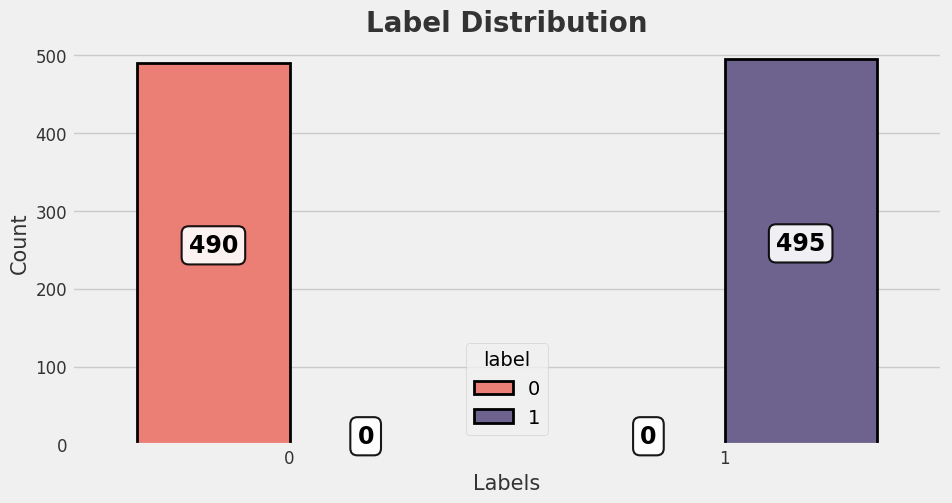

In [27]:
background_color = '#f0f0f0'
plt.figure(figsize=(10, 5), facecolor=background_color)
sns.set_palette("pastel")
p = sns.countplot(x="label", data=df, edgecolor='black', linewidth=2, width=0.7, palette = color_palette, hue="label")

for container in p.containers:
    p.bar_label(container, label_type="center", color="black", fontsize=17, weight='bold', padding=6, 
                bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "white", "edgecolor": "black", "linewidth": 1.5, "alpha": 0.9})


plt.title("Label Distribution", fontweight='bold', fontsize=20, color='#333333')
plt.ylabel("Count", fontsize=15, color='#333333')
plt.xlabel("Labels", fontsize=15, color='#333333')

p.set_facecolor(background_color)
p.tick_params(colors='#333333', labelsize=12)

plt.show()

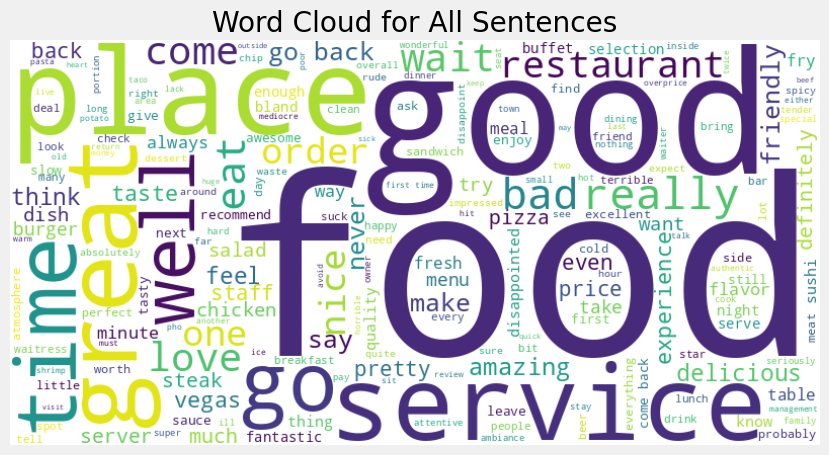

In [28]:
all_text = ' '.join(df['sentence'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for All Sentences')
plt.axis('off')
plt.show()

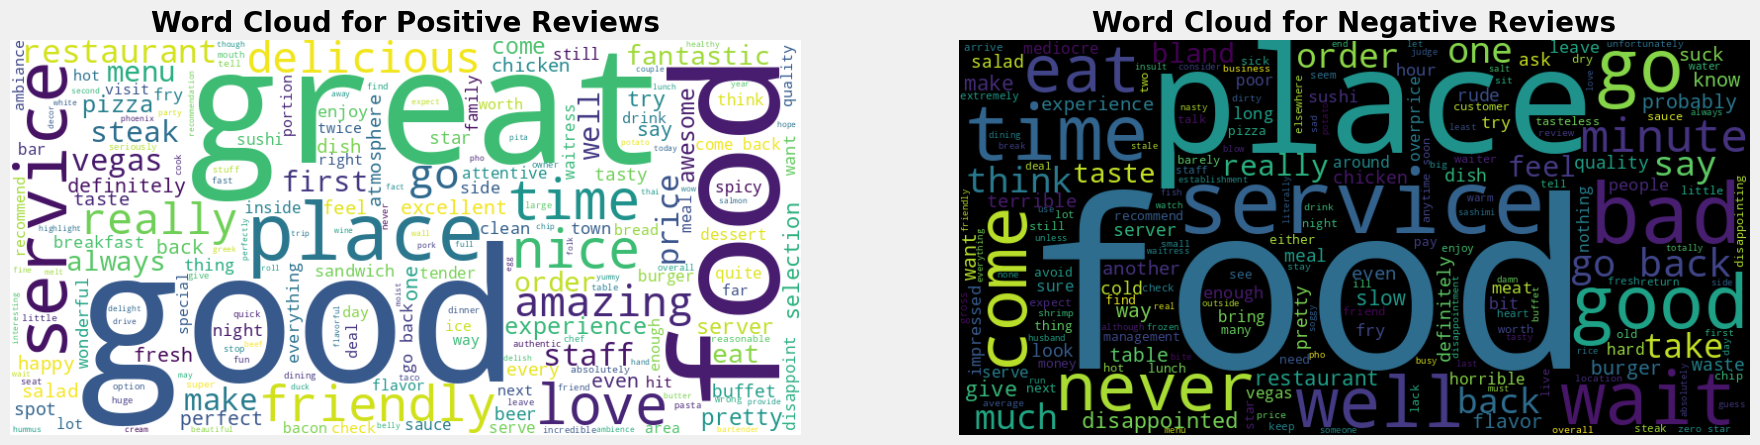

In [29]:
positive_text = ' '.join(df[df['label'] == 1]['sentence'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

negative_text = ' '.join(df[df['label'] == 0]['sentence'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=20, fontweight = 'bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=20, fontweight = 'bold')
plt.axis('off')

plt.show()

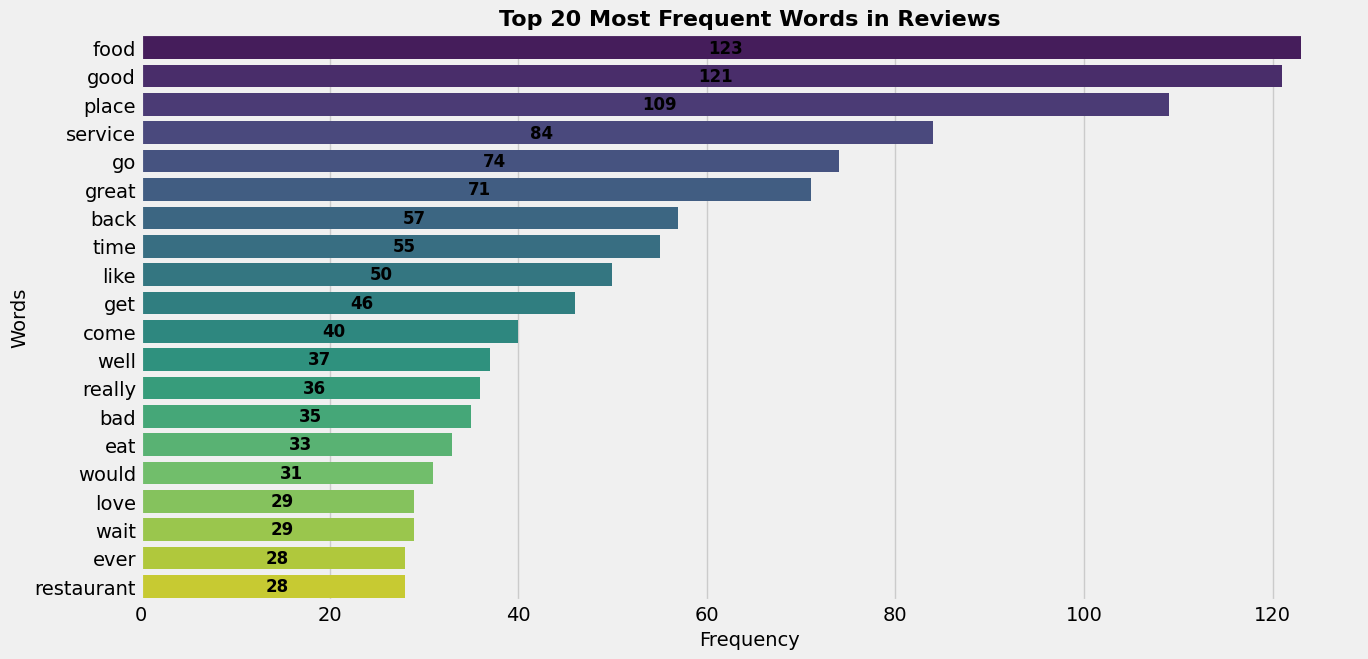

In [30]:
reviews = df['sentence']
positive_text = ' '.join(reviews)
positive_words = positive_text.split()
word_freq = Counter(positive_words)

most_common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(14, 7))
p = sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')

for container in p.containers:
    p.bar_label(container, label_type='center', color='black', fontsize=12, weight='bold', padding=3, fmt='%d')

plt.title('Top 20 Most Frequent Words in Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

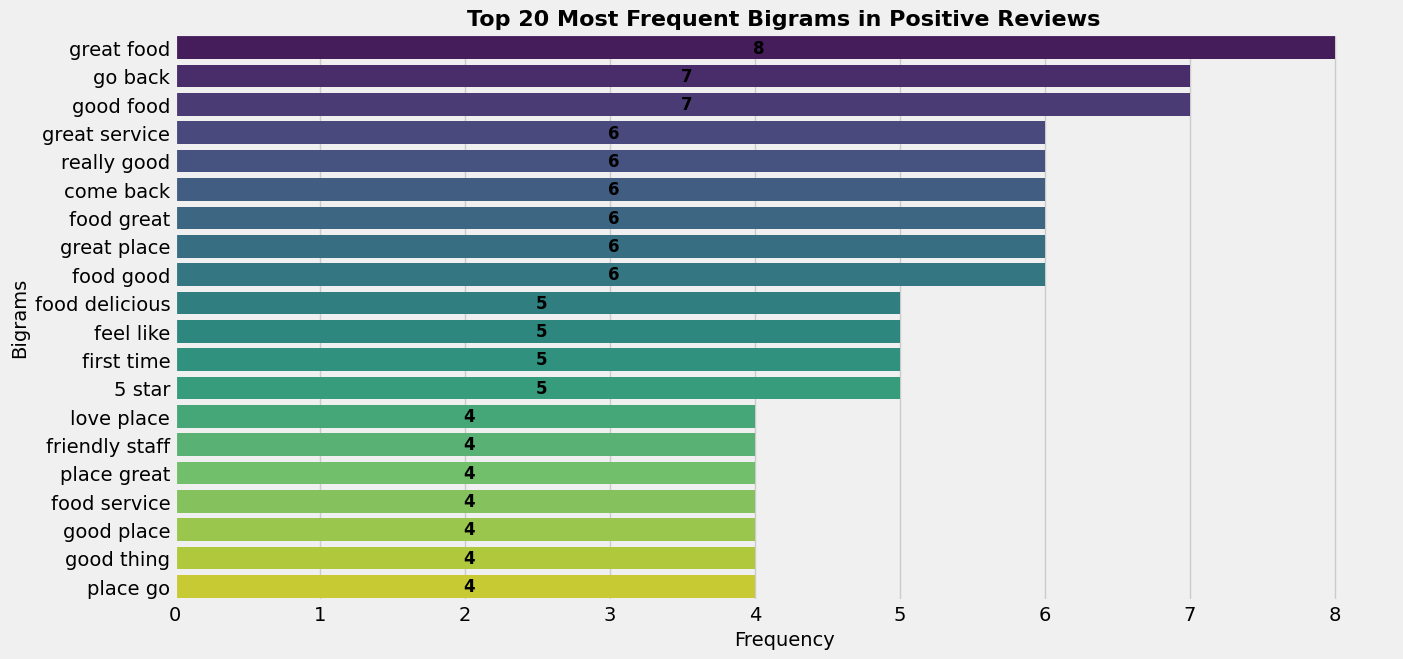

In [31]:
positive_reviews = df[df['label'] == 1]['sentence']
positive_text = ' '.join(positive_reviews)
positive_words = positive_text.split()
positive_bigrams = list(ngrams(positive_words, 2))

bigram_freq = Counter(positive_bigrams)

most_common_bigrams = bigram_freq.most_common(20)
common_bigrams_df = pd.DataFrame(most_common_bigrams, columns=['bigram', 'count'])
common_bigrams_df['bigram'] = common_bigrams_df['bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(14, 7))
p = sns.barplot(x='count', y='bigram', data=common_bigrams_df, palette='viridis')
for container in p.containers:
    p.bar_label(container, label_type='center', color='black', fontsize=12, weight='bold', padding=3, fmt='%d')

plt.title('Top 20 Most Frequent Bigrams in Positive Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Bigrams', fontsize=14)
plt.show()

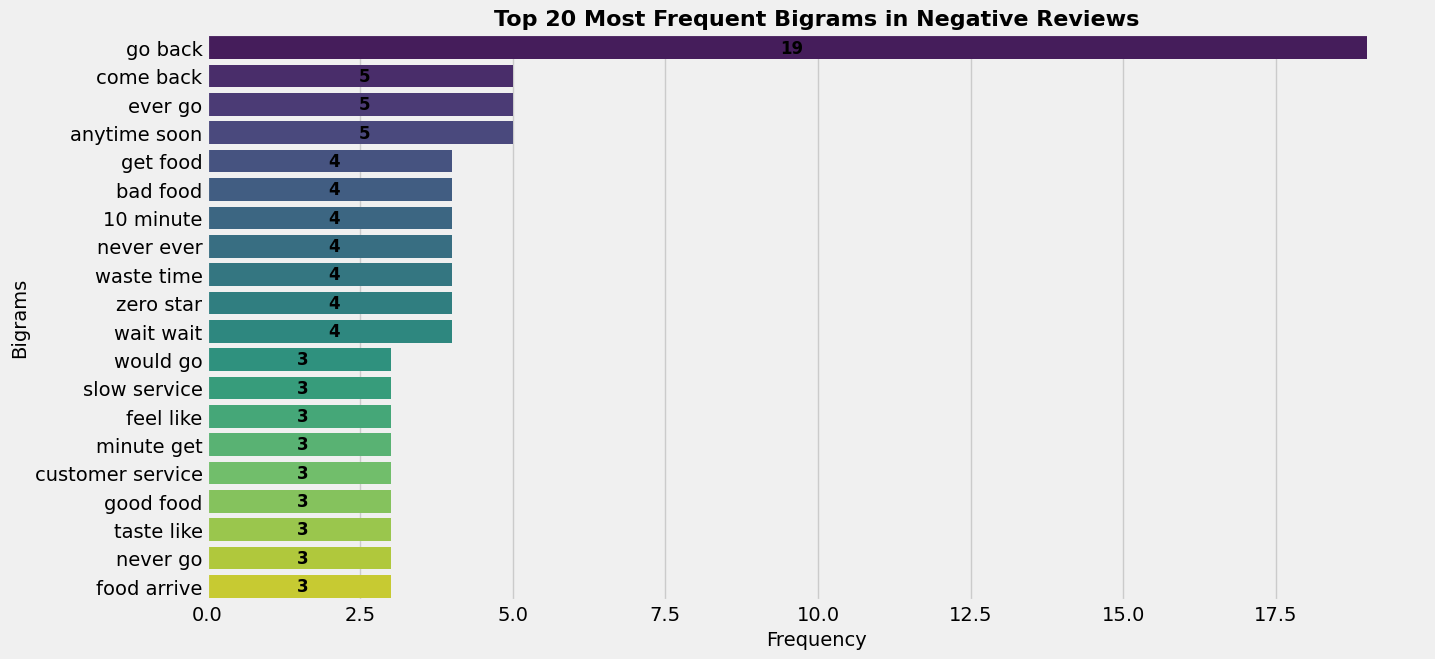

In [32]:
positive_reviews = df[df['label'] == 0]['sentence']
positive_text = ' '.join(positive_reviews)
positive_words = positive_text.split()
positive_bigrams = list(ngrams(positive_words, 2))

bigram_freq = Counter(positive_bigrams)

most_common_bigrams = bigram_freq.most_common(20)
common_bigrams_df = pd.DataFrame(most_common_bigrams, columns=['bigram', 'count'])
common_bigrams_df['bigram'] = common_bigrams_df['bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(14, 7))
p = sns.barplot(x='count', y='bigram', data=common_bigrams_df, palette='viridis')
for container in p.containers:
    p.bar_label(container, label_type='center', color='black', fontsize=12, weight='bold', padding=3, fmt='%d')

plt.title('Top 20 Most Frequent Bigrams in Negative Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Bigrams', fontsize=14)
plt.show()

<div style="border-radius: 5px; border: 1px solid #000000; padding: 20px; background-color: #eff0ea; text-align: left; color: #0e2a45;">
    <u>In the <b>Data Exploration</b> part, I found the following insights:</u>
    <ul>
        <li>The distribution of the <b>label</b> column is 0: 490 and 1: 495, where 0 indicates negative reviews and 1 indicates positive reviews</li>
        <li>I created a word cloud for all the sentence data and found that the word <b>food</b> is the most prominent, followed by <b>good</b>, <b>place</b>, <b>service</b>, <b>great</b>, and <b>time</b></li>
        <li>I generated word clouds for positive and negative reviews individually:
            <ul>
                <li>The positive word cloud highlights words like <b>place</b>, <b>good</b>, <b>great</b>, <b>service</b>, and <b>love</b></li>
                <li>The negative word cloud highlights words like <b>food</b>, <b>bad</b>, <b>come</b>, <b>time</b>, <b>minute</b>, <b>wait</b>, and <b>never</b></li>
            </ul>
        </li>
        <li>I plotted the 20 most frequent words using a bar plot. The top 3 words are: <b>food</b>, <b>good</b>, and <b>place</b></li>
        <li>I plotted the top 20 most frequent bigrams in positive reviews. The top 3 bigrams are: <b>great food</b>, <b>go back</b>, and <b>good service</b></li>
        <li>For the top 20 most frequent bigrams in negative reviews, the top 3 bigrams are: <b>go back</b>, <b>come back</b>, and <b>ever go</b></li>
    </ul>
</div>

<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing & Data Normalization </h1>

In [33]:
df['sentence'] = df['sentence'].apply(remove_special_characters)

In [34]:
df[df['sentence'] == '']

,sentence,label
140,,0


In [35]:
df.drop(df[df['sentence'] == ''].index, inplace = True)

In [36]:
x = df['sentence'].values
y = df['label'].values

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [38]:
tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(x_train)

In [39]:
word_index = tokenizer.word_index

In [40]:
list(word_index)[:10]

['<oov>',
 'good',
 'food',
 'place',
 'service',
 'go',
 'great',
 'like',
 'get',
 'time']

In [41]:
len(word_index)

1450

In [42]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [43]:
x_train[:10]

[[592, 200, 372, 156],
 [7, 10, 129, 106, 593, 79],
 [7, 5, 3],
 [80, 594, 130, 595],
 [20, 157, 373, 3, 40, 374, 596, 269, 375, 41, 81, 376, 131, 54, 4],
 [7, 201, 107],
 [108, 65],
 [202, 203],
 [22, 22, 22],
 [204, 8, 2, 158, 4, 597, 205, 377, 598, 3, 599, 82, 270]]

In [44]:
sequence_lengths = [len(seq) for seq in x_train]

# Find the minimum and maximum lengths
min_length = min(sequence_lengths)
max_length = max(sequence_lengths)

print(f"Minimum sequence length: {min_length}")
print(f"Maximum sequence length: {max_length}")

Minimum sequence length: 1
Maximum sequence length: 18


In [45]:
error_sentences = df[df['sentence'].apply(lambda x: len(x.split()) < 2)]

print("Rows with sentences having fewer than 2 words:")
print(error_sentences)

Rows with sentences having fewer than 2 words:
          sentence label
19            like     0
24         perform     1
83           place     1
96            back     1
98            good     0
115          check     1
165      delicious     1
272           beat     1
278          think     0
326     disappoint     1
351       terrible     0
380           back     0
388       disgrace     0
424        mistake     0
425      complaint     1
453       insulted     0
479           love     1
489        awesome     1
581           rate     0
609            eat     0
619         return     0
621  disappointing     0
663          great     1
670             go     0
697        mortify     0
711          thing     0
764          happy     1
813           pack     0
834      excellent     1
911            sad     0
947   disappointed     0


In [46]:
maxlen = 20
x_train = pad_sequences(x_train, padding = 'post', maxlen = maxlen, truncating = 'post')
x_test = pad_sequences(x_test, padding = 'post', maxlen = maxlen, truncating = 'post')

In [47]:
x_train[4]

array([ 20, 157, 373,   3,  40, 374, 596, 269, 375,  41,  81, 376, 131,
        54,   4,   0,   0,   0,   0,   0], dtype=int32)

In [48]:
len(x_train[0])

20

In [49]:
x_train.shape

(787, 20)

<div style="border-radius: 5px; border: 1px solid #000000; padding: 20px; background-color: #eff0ea; text-align: left; color: #0e2a45;">
    In the <b>Data Preprocessing & Data Normalization</b> part:
    <ul>
        <li>I found that there were rows with empty values, so I dropped them</li>
        <li>Separated the input features and output labels into <b>X</b> (input) and <b>Y</b> (output) variables</li>
        <li>Split the dataset into training and testing sets with an 80:20 ratio</li>
        <li>Tokenized the sentences using Keras <b>Tokenizer</b>, fit on the text, and then applied text-to-sequence transformation</li>
        <li>Found that the minimum sequence length is 1 and the maximum sequence length is 18</li>
        <li>Applied <b>pad_sequences</b> with <b>padding='post'</b>, <b>maxlen=20</b>, and <b>truncating='post'</b></li>
    </ul>
</div>

<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building, Compiling, & Training </h1>

In [50]:
model = Sequential()

model.add(Embedding(input_dim=len(word_index) + 1, output_dim=12))
model.add(SimpleRNN(22, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.1)))

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


In [53]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, callbacks=[early_stopping], batch_size = 26 )

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4791 - loss: 0.8647 - val_accuracy: 0.5482 - val_loss: 0.8319
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5884 - loss: 0.8136 - val_accuracy: 0.5787 - val_loss: 0.7969
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7518 - loss: 0.7022 - val_accuracy: 0.5533 - val_loss: 0.8105
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8447 - loss: 0.5550 - val_accuracy: 0.5787 - val_loss: 0.8409
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9206 - loss: 0.4198 - val_accuracy: 0.5381 - val_loss: 0.9473
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9367 - loss: 0.3320 - val_accuracy: 0.5685 - val_loss: 0.9977
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9692 - loss: 0.2848 - val_accuracy: 0.5939 - val_loss: 1.0118
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9816 - loss: 0.2479 - val_accuracy: 0.5787 - val_loss

<div style="border-radius: 5px; border: 1px solid #000000; padding: 20px; background-color: #eff0ea; text-align: left; color: #0e2a45;">
<b><u>Model Building, Compiling, & Training:</b></u>
<ul>
<li>Keras Sequential Model: Used a <b>Sequential</b> model from the Keras library for building the neural network.</li>
<li>Network Architecture: The model consists of three layers:
<ul>
<li>Embedding Layer: This layer takes numerical representations of words (tokens) and maps them to dense vectors, capturing semantic relationships between words.</li>
<li>SimpleRNN Layer: This <b>recurrent</b> layer processes the sequence of embedded tokens, capturing temporal dependencies in the data.</li>
<li>Dropout Layer: This layer randomly drops a certain percentage of units during training, helping to prevent overfitting.</li>
</ul>
</li>
<li>Loss Function: Used <b>binary cross-entropy</b> as the loss function, suitable for binary classification problems.</li>
<li>Optimizer: Used the <b>Adam</b> optimizer, an efficient algorithm for optimizing the model's weights during training.</li>
<li>Metrics: Tracked the model's <b>accuracy</b> during training to evaluate its performance.</li>
<li>Training Process: Fit the model on the training data (X_train and Y_train) with a specified batch size. Additionally, used an <b>Early Stopping</b> callback to halt training if the validation performance doesn't improve for a certain number of epochs, preventing overfitting.</li>
</ul>
</div>

<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualizing Model Loss & Accuracy </h1>

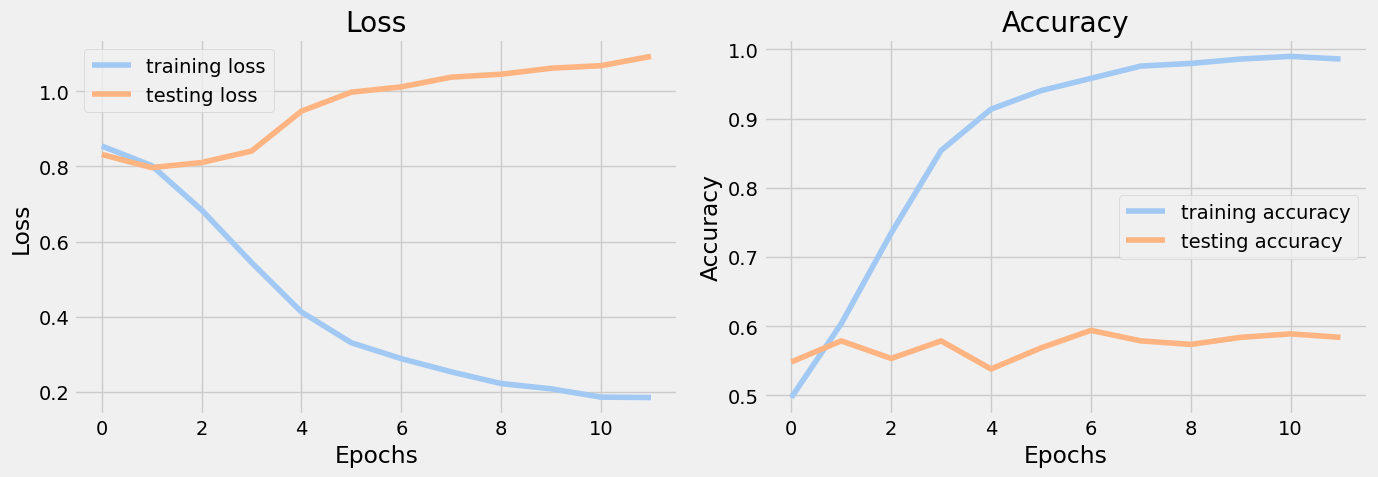

In [54]:
fig, axes = plt.subplots(1,2 , figsize =(14, 5))

sns.lineplot(ax = axes[0], data = history.history['loss'], label = 'training loss' )
sns.lineplot(ax= axes[0], data = history.history['val_loss'], label = 'testing loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

sns.lineplot(ax = axes[1], data = history.history['accuracy'], label = 'training accuracy')
sns.lineplot(ax = axes[1], data = history.history['val_accuracy'], label = 'testing accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Model Prediciton </h1>

In [55]:
def preprocess_input(sentence, tokenizer, maxlen=20):
    remove_spec_char = remove_special_characters(sentence)
    print(remove_spec_char)
    remove_stop_wrod = remove_stopwords(remove_spec_char)
    print(remove_stop_wrod)
    lema_sentence = lemmatize_sentence(remove_stop_wrod)
    print(lema_sentence)

    tokenize_sequence = tokenizer.texts_to_sequences([lema_sentence])
    padded_sequence = pad_sequences(tokenize_sequence, maxlen=maxlen, padding='post', truncating='post')
    
    return padded_sequence

In [56]:
sentence = 'The food was amazing and the service was excellent'
padded_input = preprocess_input(sentence, tokenizer, maxlen=20)
prediction = model.predict(padded_input)
print(f"Raw prediction value: {prediction[0][0]}")

# Determine if it's positive or negative
threshold = 0.5
if prediction[0][0] > threshold:
    print("Prediction: Positive")
else:
    print("Prediction: Negative")

The food was amazing and the service was excellent
food amazing service excellent
food amazing service excellent
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Raw prediction value: 0.9252229928970337
Prediction: Positive


In [57]:
sentence = 'Bad service i will never come again'
padded_input = preprocess_input(sentence, tokenizer, maxlen=20)
prediction = model.predict(padded_input)
print(f"Raw prediction value: {prediction[0][0]}")

# Determine if it's positive or negative
threshold = 0.5
if prediction[0][0] > threshold:
    print("Prediction: Positive")
else:
    print("Prediction: Negative")

Bad service i will never come again
Bad service never come
bad service never come
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Raw prediction value: 0.08779943734407425
Prediction: Negative


<a id = "1"></a>
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Conclusion </h1>

<div style="border-radius: 5px; border: 1px solid #000000; padding: 20px; background-color: #eff0ea; text-align: left; color: #0e2a45;">
    <u><b>Conclusion</b></u>
    <p>In the initial <b>data exploration</b>, we found that the dataset contains three columns: <b>Unnamed:0</b>, <b>sentence</b>, and <b>label</b>. The <b>Unnamed:0</b> column, serving as an index, was dropped, and the datatype of the <b>label</b> column was converted to a category. The dataset had no null or duplicate values initially.</p>
    <p>During <b>data cleaning</b>, special characters were removed from the <b>sentence</b> column, text was converted to lowercase, stopwords were eliminated, and sentences were lemmatized using <b>spaCy</b>. Post-processing, duplicate values were found and removed.</p>
    <p><b>Exploratory Data Analysis (EDA)</b> revealed a balanced distribution of labels, with 490 negative and 495 positive reviews. Word clouds showed that <b>food</b> was the most prominent word overall. Positive reviews frequently mentioned words like <b>place</b>, <b>good</b>, and <b>service</b>, while negative reviews highlighted <b>bad</b>, <b>come</b>, and <b>wait</b>. The most frequent words and bigrams were plotted, revealing common phrases and sentiments in the reviews.</p>
    <p>In the <b>preprocessing and normalization</b> stage, rows with empty values were dropped. The data was split into training and testing sets in an 80:20 ratio. Sentences were tokenized using <b>Keras Tokenizer</b> and transformed into sequences, which were then padded to ensure uniform length.</p>
    <p>The <b>model</b> was built using a <b>Keras Sequential</b> model with an embedding layer, a <b>SimpleRNN</b> layer, and a <b>dropout</b> layer to prevent overfitting. The model was trained using <b>binary cross-entropy loss</b> and the <b>Adam optimizer</b>, with early stopping to avoid overfitting. The final model achieved an accuracy of <b>0.9776</b> and a validation accuracy of <b>0.7157</b>.</p>
    <p>Model predictions on test sentences were accurate: "The food was amazing and the service was excellent" was correctly predicted as <b>positive</b>, and "Bad service, I will never come again" was correctly predicted as <b>negative</b>.</p>
    <p><b>Thanks for your time to see my notebook</b> 🙏. Please give an <b>upvote</b> to motivate me! 👍</p>
</div>